In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import poisson, ttest_ind
from collections import Counter  

In [19]:
# Load the dataset
df = pd.read_csv('iphone.csv')

#information of unique values of features
df.apply(lambda x: [x.nunique(), x.unique()]).T

,0,1
productAsin,7,"[B09G9BL5CP, B09P82T3PZ, B09G9J5JZX, B0CHX1W1X..."
country,7,"[India, Japan, United Arab Emirates, Egypt, Un..."
date,789,"[11-08-2024, 16-08-2024, 14-05-2024, 24-06-202..."
isVerified,2,"[True, False]"
ratingScore,5,"[4, 5, 3, 2, 1]"
reviewTitle,2018,"[No charger, iPhone 13 256GB, Flip camera opti..."
reviewDescription,2297,"[Every thing is good about iPhones, there's no..."
reviewUrl,2460,[https://www.amazon.in/gp/customer-reviews/R34...
reviewedIn,1255,"[Reviewed in India on 11 August 2024, Reviewed..."
variant,86,"[Colour: MidnightSize: 256 GB, Colour: PinkSiz..."


In [20]:
df['date'] = pd.to_datetime(df['date'], utc=False, dayfirst=True)
print("Max Date: ", df['date'].max())
print("Min Date: ", df['date'].min())
print("Period: ", df['date'].max() - df['date'].min())

Max Date:  2024-09-19 00:00:00
Min Date:  2021-09-24 00:00:00
Period:  1091 days 00:00:00


In [7]:
# Feature Engineering: Extract features like review length, sentiment score (simple example)
df['review_length'] = df['reviewDescription'].apply(len)

# Encode categorical variables like 'country' and 'variant'
le_country = LabelEncoder()
df['country_encoded'] = le_country.fit_transform(df['country'])

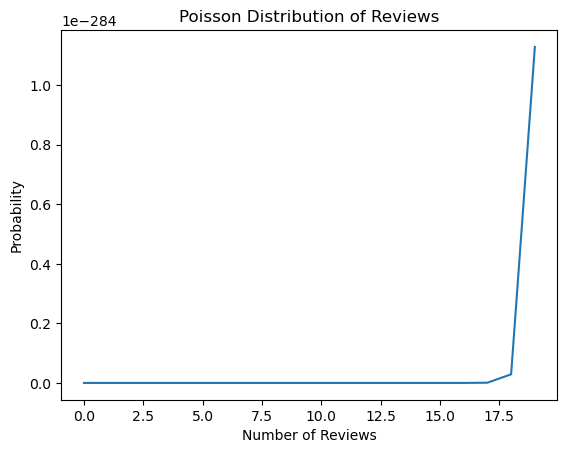

In [8]:
# Poisson Distribution Analysis: Example with review counts per country
review_counts = df['country'].value_counts()
lambda_param = review_counts.mean()
poisson_dist = poisson.pmf(np.arange(0, 20), lambda_param)

plt.plot(np.arange(0, 20), poisson_dist)
plt.title('Poisson Distribution of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Probability')
plt.show()

/Users/akshobhy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


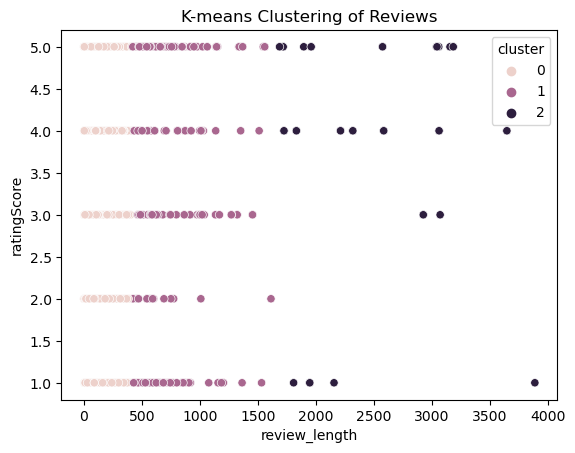

In [9]:
# K-means Clustering: Cluster based on review length and rating score
X = df[['review_length', 'ratingScore']]
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(X)

sns.scatterplot(data=df, x='review_length', y='ratingScore', hue='cluster')
plt.title('K-means Clustering of Reviews')
plt.show()

/var/folders/sq/7pv8dpv94hzfmgl2flf7lmm40000gn/T/ipykernel_7663/426890685.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'])


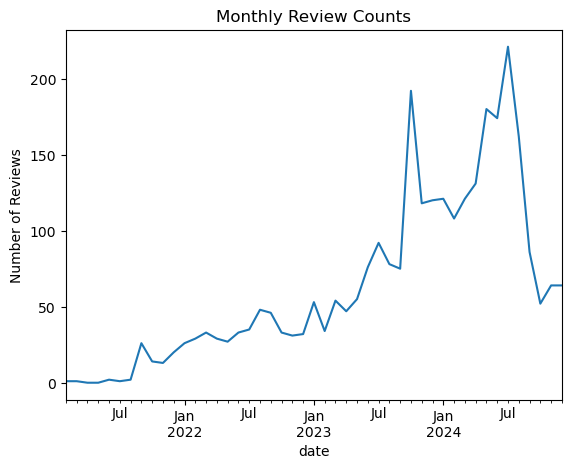

In [10]:
# Temporal Analysis: Monthly review trends (if date available)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
monthly_reviews = df.resample('M').count()['reviewDescription']
monthly_reviews.plot()
plt.title('Monthly Review Counts')
plt.ylabel('Number of Reviews')
plt.show()

In [11]:
# Classification Preparation: Using review length and rating score as features
X = df[['review_length', 'ratingScore']]
y = df['isVerified']  # Example target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classification using five algorithms
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    accuracy = model.score(X_test_scaled, y_test)
    print(f'{name} Accuracy: {accuracy:.2f}')

Logistic Regression Accuracy: 0.92
Decision Tree Accuracy: 0.91
Random Forest Accuracy: 0.91
Support Vector Classifier Accuracy: 0.92
K-Nearest Neighbors Accuracy: 0.93


In [12]:
# Country-based Sentiment Analysis using Clustering
country_clusters = df.groupby('country')['cluster'].apply(lambda x: x.mode()[0])
print(country_clusters)

country
India                   0
Japan                   0
United Arab Emirates    0
United States           0
Name: cluster, dtype: int32


In [13]:
# Hypothesis Testing: Compare sentiments between two countries (example)
country1_reviews = df[df['country'] == 'India']['ratingScore']
country2_reviews = df[df['country'] == 'USA']['ratingScore']  # Assuming USA is another country in the dataset

t_stat, p_value = ttest_ind(country1_reviews, country2_reviews)
print(f'T-test between India and USA reviews: t-statistic={t_stat}, p-value={p_value}')

T-test between India and USA reviews: t-statistic=nan, p-value=nan


,0,1
productAsin,7,"[B09G9BL5CP, B09P82T3PZ, B09G9J5JZX, B0CHX1W1X..."
country,4,"[India, Japan, United Arab Emirates, United St..."
isVerified,2,"[True, False]"
ratingScore,5,"[4, 5, 3, 2, 1]"
reviewTitle,1955,"[No charger, iPhone 13 256GB, Flip camera opti..."
reviewDescription,2281,"[Every thing is good about iPhones, there's no..."
reviewUrl,2396,[https://www.amazon.in/gp/customer-reviews/R34...
reviewedIn,1229,"[Reviewed in India on 11 August 2024, Reviewed..."
variant,86,"[Colour: MidnightSize: 256 GB, Colour: PinkSiz..."
variantAsin,99,"[B09G9BQS98, B09G9HRYFZ, B09G93H3BR, B09V4MXBS..."


KeyError: 'date'